## Initial imports and install


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install ts2vg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.7 MB/s eta 0:00:00


In [3]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.2 MB/s eta 0:00:00


In [4]:
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.6/344.6 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pycairo (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  G

# Data Import

In [5]:
import os
import pandas as pd
from google.colab import drive

# mount the Google Drive
drive.mount('/content/drive')

# all 120 csv files were stored in a folder called 'Master' and read from Google Drive
# set the path to the directory containing the CSV files
path = '/content/drive/MyDrive/Master/'

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

# Loop through each CSV file and create a dataframe with the same name as the file
for file in csv_files:
    # Get the filename without the extension
    filename = os.path.splitext(file)[0]
    
    # Read the CSV file into a dataframe and name it using the filename
    globals()[filename] = pd.read_csv(os.path.join(path, file))


Mounted at /content/drive


In [6]:
# List all variables in the current namespace
all_vars = dir()

# Filter variables that are pandas dataframes
df_names = [var for var in all_vars if isinstance(eval(var), pd.DataFrame)]

# Print the names of all dataframes
print(df_names)

['Sub10_acc_climbingdown_chest', 'Sub10_acc_climbingdown_head', 'Sub10_acc_climbingup_chest', 'Sub10_acc_climbingup_head', 'Sub10_acc_running_chest', 'Sub10_acc_running_head', 'Sub10_acc_walking_chest', 'Sub10_acc_walking_head', 'Sub11_acc_climbingdown_chest', 'Sub11_acc_climbingdown_head', 'Sub11_acc_climbingup_chest', 'Sub11_acc_climbingup_head', 'Sub11_acc_running_chest', 'Sub11_acc_running_head', 'Sub11_acc_walking_chest', 'Sub11_acc_walking_head', 'Sub12_acc_climbingdown_chest', 'Sub12_acc_climbingdown_head', 'Sub12_acc_climbingup_chest', 'Sub12_acc_climbingup_head', 'Sub12_acc_running_chest', 'Sub12_acc_running_head', 'Sub12_acc_walking_chest', 'Sub12_acc_walking_head', 'Sub13_acc_climbingdown_chest', 'Sub13_acc_climbingdown_head', 'Sub13_acc_climbingup_chest', 'Sub13_acc_climbingup_head', 'Sub13_acc_running_chest', 'Sub13_acc_running_head', 'Sub13_acc_walking_chest', 'Sub13_acc_walking_head', 'Sub14_acc_climbingdown_chest', 'Sub14_acc_climbingdown_head', 'Sub14_acc_climbingup_ch

# Task 1

In [7]:
from ts2vg import HorizontalVG
from ts2vg import NaturalVG
import numpy as np

# list of attribute names
attr_names = ['attr_x', 'attr_y', 'attr_z']

# create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Method', 'Subject', 'Accelerometer axis', 'Average degree', 'Network diameter', 'Average path length', 'Activity'])

# iterate over each dataframe
for name in df_names:
    # get the subject number and activity name from the dataframe name
    split_name = name.split('_')
    subject = split_name[0]
    activity = '_'.join(split_name[2:])
  
    # load dataframe
    df = globals()[name]
    
    # iterate over each attribute
    for attr in attr_names:
        # select sample size
        sample = df[attr][1000:2024]
        
        # compute HVG
        h = HorizontalVG()
        h.build(sample)
        ig_h = h.as_igraph()
        
        # compute NVG
        n = NaturalVG()
        n.build(sample)
        ig_n = n.as_igraph()
        
        # compute average degree
        avg_degree_h = np.mean(ig_h.degree())
        avg_degree_n = np.mean(ig_n.degree())
        
        # compute network diameter
        diameter_h = ig_h.diameter()
        diameter_n = ig_n.diameter()
        
        # compute average path length
        path_length_h = ig_h.average_path_length()
        path_length_n = ig_n.average_path_length()
        
        # add the computed results to the results dataframe
        results_df = results_df.append({
            'Method': 'HVG',
            'Subject': subject,
            'Accelerometer axis': attr,
            'Average degree': avg_degree_h,
            'Network diameter': diameter_h,
            'Average path length': path_length_h,
            'Activity': activity
        }, ignore_index=True)
        
        results_df = results_df.append({
            'Method': 'NVG',
            'Subject': subject,
            'Accelerometer axis': attr,
            'Average degree': avg_degree_n,
            'Network diameter': diameter_n,
            'Average path length': path_length_n,
            'Activity': activity
        }, ignore_index=True)

# display the results dataframe
results_df

,Method,Subject,Accelerometer axis,Average degree,Network diameter,Average path length,Activity
0,HVG,Sub10,attr_x,3.955078,27,11.628796,climbingdown_chest
1,NVG,Sub10,attr_x,9.802734,10,4.456497,climbingdown_chest
2,HVG,Sub10,attr_y,3.894531,60,23.671071,climbingdown_chest
3,NVG,Sub10,attr_y,12.439453,49,18.896419,climbingdown_chest
4,HVG,Sub10,attr_z,3.951172,25,10.098342,climbingdown_chest
...,...,...,...,...,...,...,...
715,NVG,Sub9,attr_x,7.371094,10,4.888762,walking_head
716,HVG,Sub9,attr_y,3.949219,33,14.345201,walking_head
717,NVG,Sub9,attr_y,18.097656,10,4.177225,walking_head
718,HVG,Sub9,attr_z,3.935547,38,16.602397,walking_head


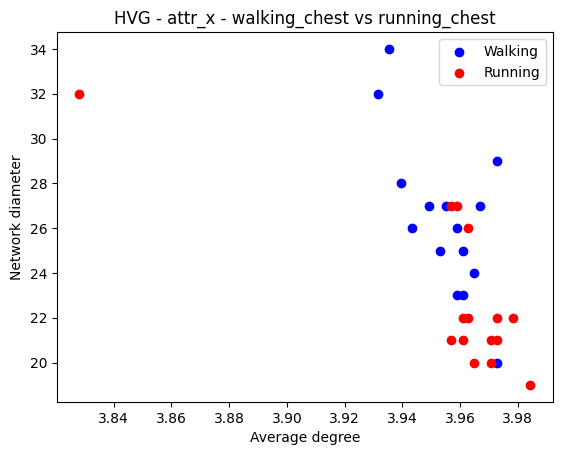

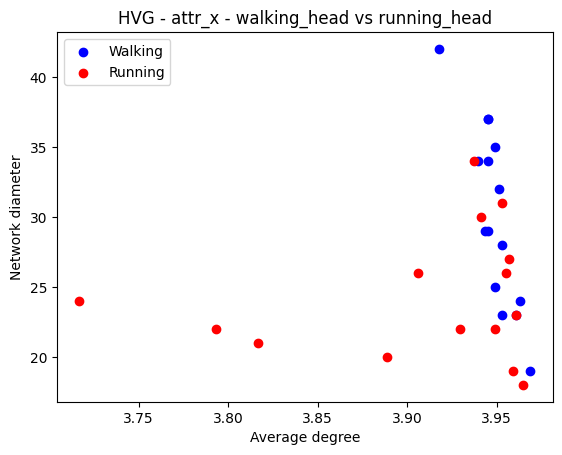

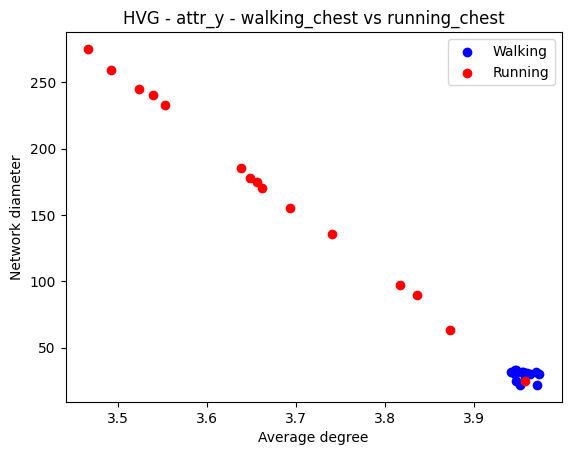

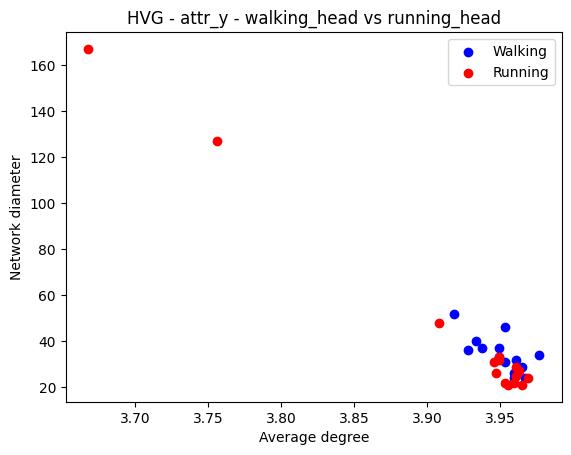

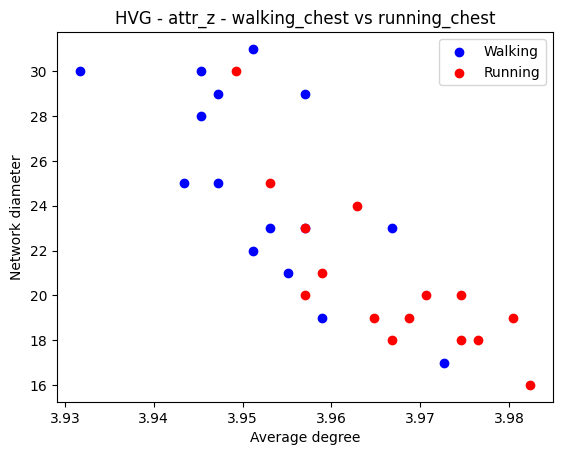

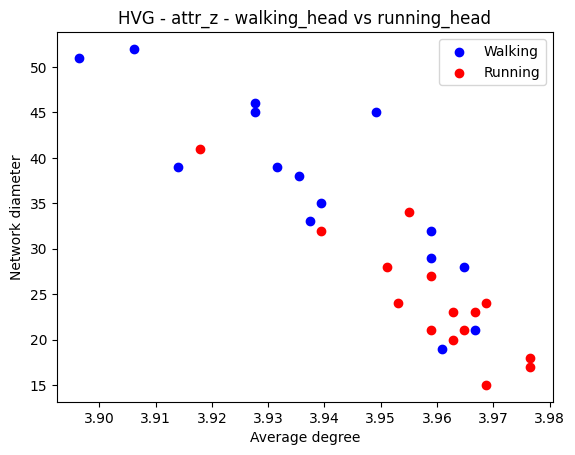

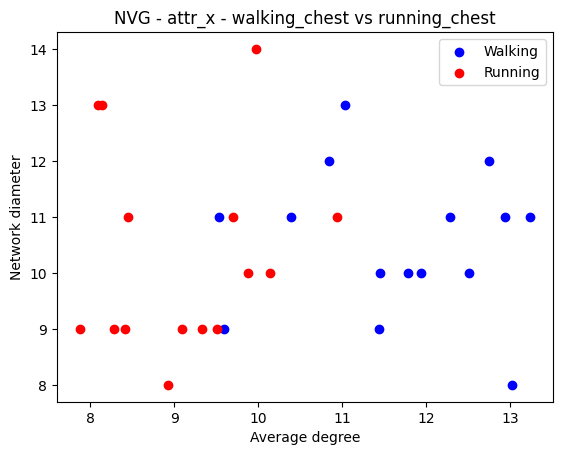

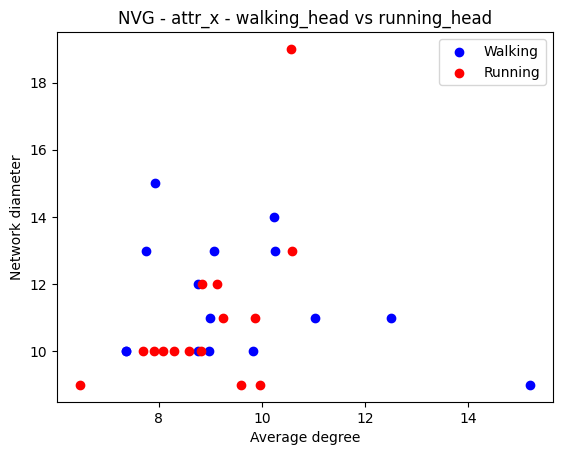

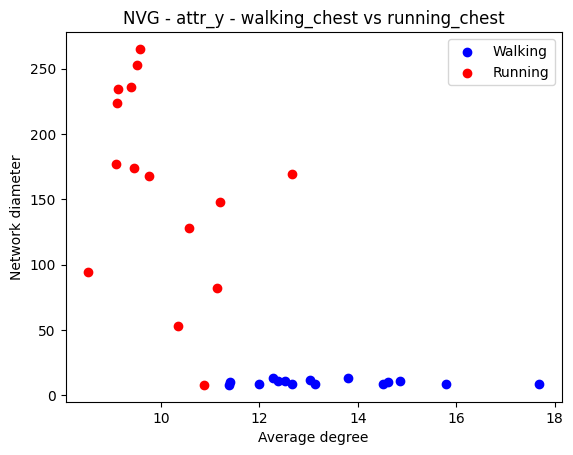

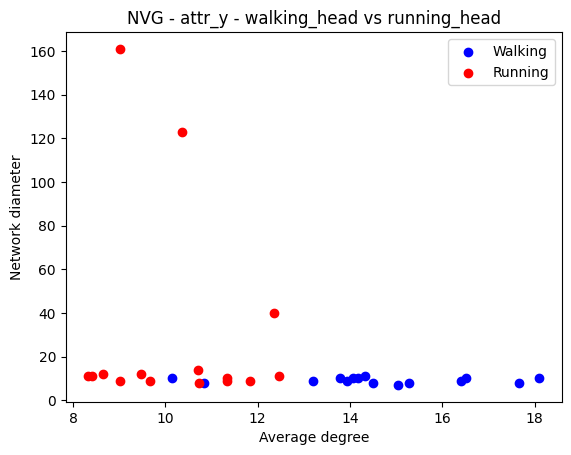

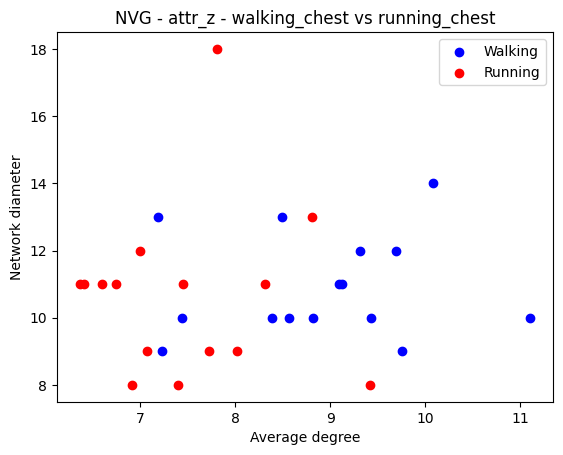

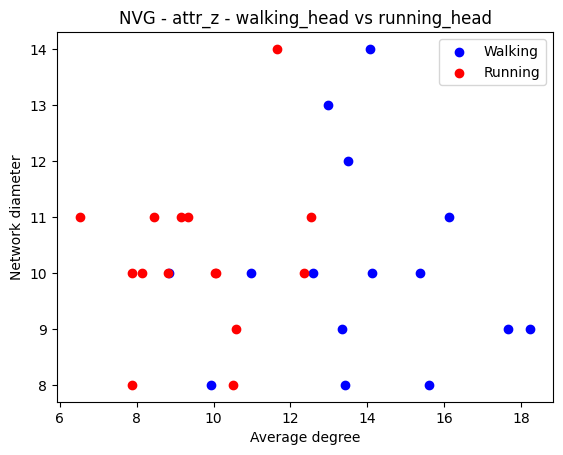

In [8]:
import matplotlib.pyplot as plt

# list of attribute names
attr_names = ['attr_x', 'attr_y', 'attr_z']

# list of activities
activities = [('walking_chest', 'running_chest'), ('walking_head', 'running_head')]

# create a dictionary to store the results for each method and attribute
results_dict = {'HVG': {}, 'NVG': {}}

# iterate over each method
for method in results_df.Method.unique():
    # iterate over each attribute
    for attr in attr_names:
        # filter the dataframe by method and attribute
        df = results_df[(results_df.Method == method) & (results_df['Accelerometer axis'] == attr)]
        
        # create a scatter plot for average degree vs network diameter for each activity pair
        for walk_act, run_act in activities:
            fig, ax = plt.subplots()
            ax.scatter(df[df.Activity == walk_act]['Average degree'], df[df.Activity == walk_act]['Network diameter'], color='blue', label='Walking')
            ax.scatter(df[df.Activity == run_act]['Average degree'], df[df.Activity == run_act]['Network diameter'], color='red', label='Running')
            ax.set_xlabel('Average degree')
            ax.set_ylabel('Network diameter')
            ax.set_title(f'{method} - {attr} - {walk_act} vs {run_act}')
            ax.legend()
            plt.show()

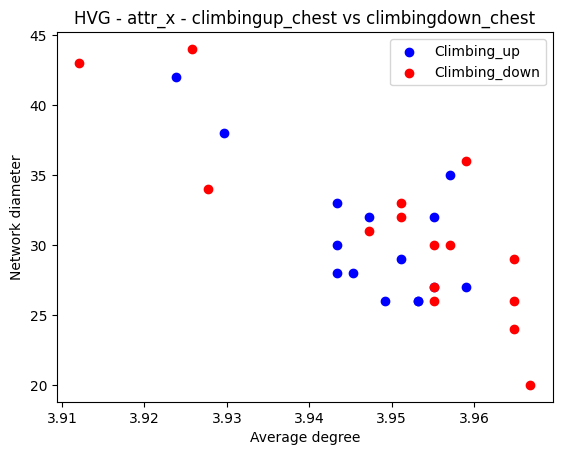

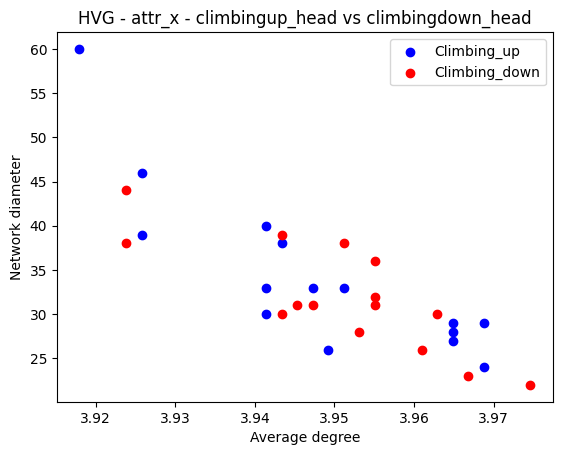

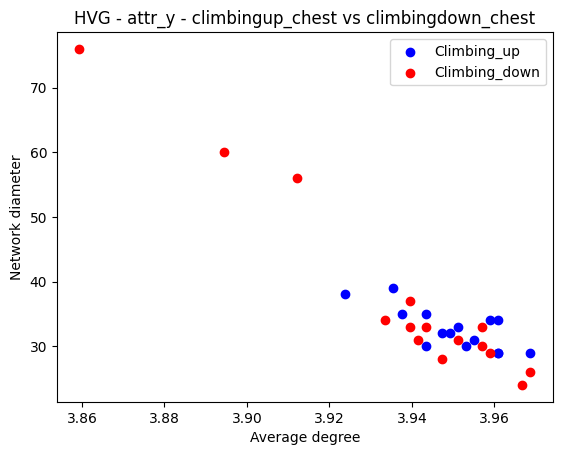

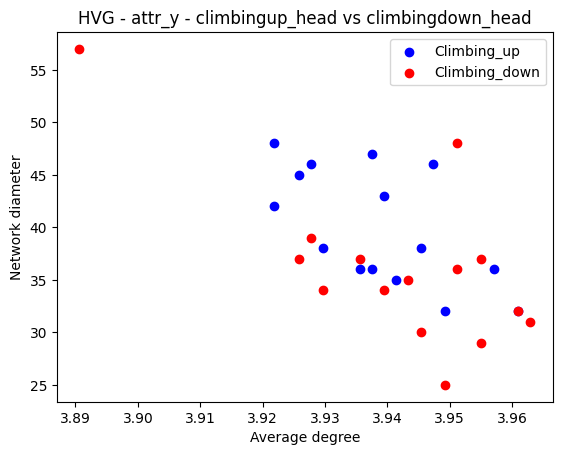

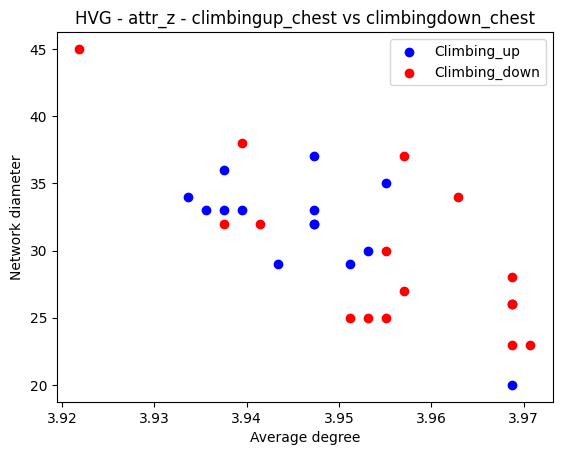

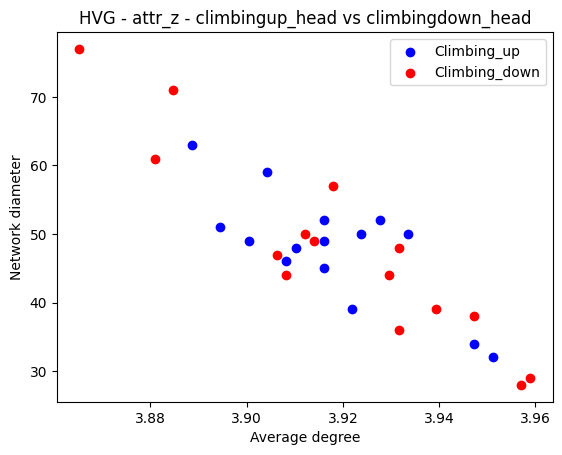

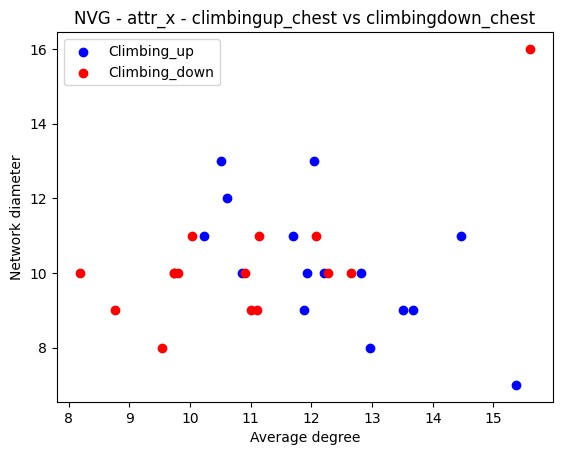

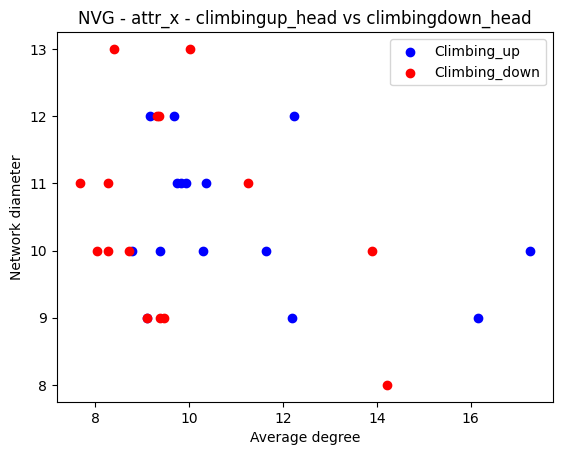

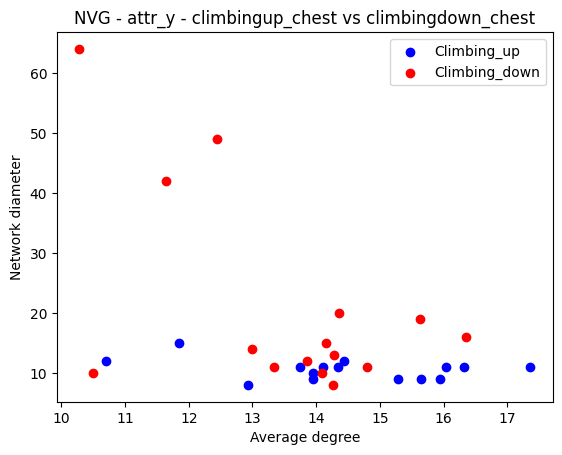

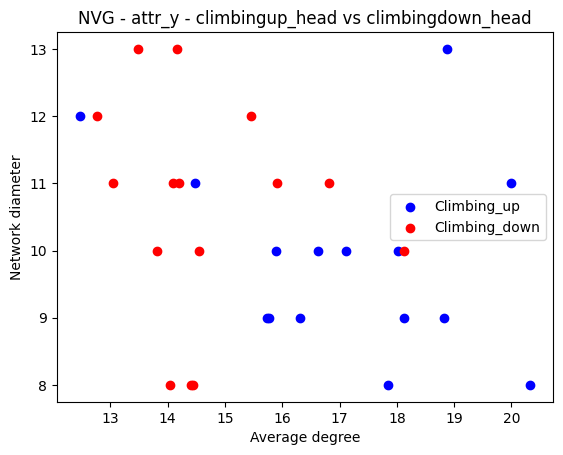

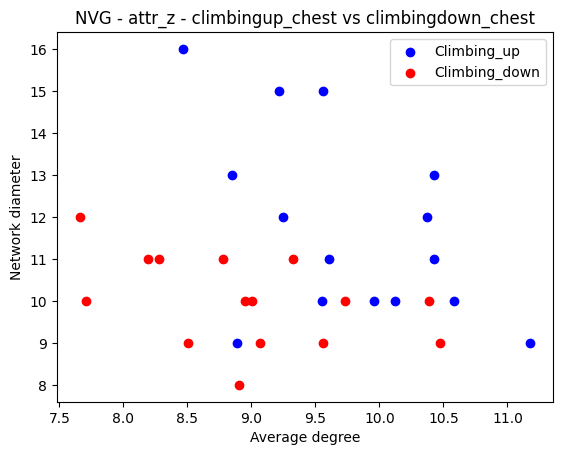

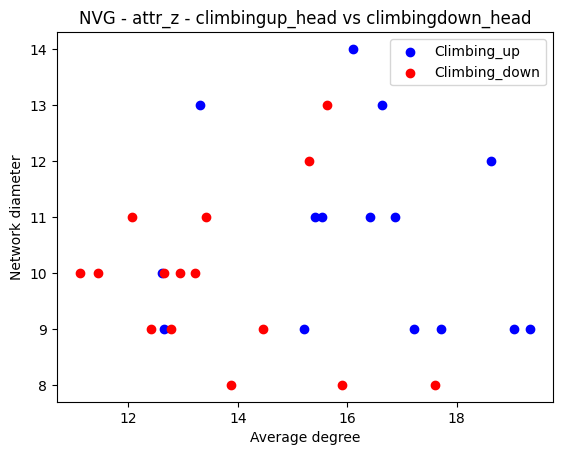

In [9]:
import matplotlib.pyplot as plt

# list of attribute names
attr_names = ['attr_x', 'attr_y', 'attr_z']

# list of activities
activities = [('climbingup_chest','climbingdown_chest'), ('climbingup_head', 'climbingdown_head')]

# create a dictionary to store the results for each method and attribute
results_dict = {'HVG': {}, 'NVG': {}}

# iterate over each method
for method in results_df.Method.unique():
    # iterate over each attribute
    for attr in attr_names:
        # filter the dataframe by method and attribute
        df = results_df[(results_df.Method == method) & (results_df['Accelerometer axis'] == attr)]
        
       # create a scatter plot for average degree vs network diameter for each activity pair
        for climbing_up_act, climbing_down_act in activities:
            fig, ax = plt.subplots()

            ax.scatter(df[df.Activity == climbing_up_act]['Average degree'], df[df.Activity == climbing_up_act]['Network diameter'], color='blue', label='Climbing_up')
            ax.scatter(df[df.Activity == climbing_down_act]['Average degree'], df[df.Activity == climbing_down_act]['Network diameter'], color='red', label='Climbing_down')
            ax.set_xlabel('Average degree')
            ax.set_ylabel('Network diameter')
            ax.set_title(f'{method} - {attr} - {climbing_up_act} vs {climbing_down_act}')
            ax.legend()
            plt.show()          